In [1]:
import uproot

In [2]:
# Read Tree
dat = uproot.open('dummy.root')['LHEF']

In [3]:
# Show the tree structures
print(type(dat))
print(dat.show())

<class 'uproot.rootio.TTree'>
Event                      TStreamerInfo              asdtype('>i4')
Event.fUniqueID            TStreamerBasicType         asjagged(asdtype('>u4'))
Event.fBits                TStreamerBasicType         asjagged(asdtype('>u4'))
Event.Number               TStreamerBasicType         asjagged(asdtype('>i8'))
Event.Nparticles           TStreamerBasicType         asjagged(asdtype('>i4'))
Event.ProcessID            TStreamerBasicType         asjagged(asdtype('>i4'))
Event.Weight               TStreamerBasicType         asjagged(asdtype('>f8'))
Event.ScalePDF             TStreamerBasicType         asjagged(asdtype('>f8'))
Event.CouplingQED          TStreamerBasicType         asjagged(asdtype('>f8'))
Event.CouplingQCD          TStreamerBasicType         asjagged(asdtype('>f8'))

Event_size                 (no streamer)              asdtype('>i4')
Rwgt                       TStreamerInfo              asdtype('>i4')
Rwgt.fUniqueID             TStreamerBasicType      

In [4]:
# Print total Entries
total_event = dat.numentries
print("total event: ",total_event)

total event:  10000


In [5]:
# Convert ROOT to jagged-arrays
PID_arr, Px_arr,Py_arr,Pz_arr,E_arr = dat.arrays(['Particle.PID','Particle.Px','Particle.Py','Particle.Pz','Particle.E'],outputtype=tuple)

In [6]:
# Number of values in each event
print(PID_arr.count())
print(Px_arr.count())
print(Py_arr.count())
print(Pz_arr.count())

[12 12 13 ... 13 13 12]
[12 12 13 ... 13 13 12]
[12 12 13 ... 13 13 12]
[12 12 13 ... 13 13 12]


In [7]:
import uproot_methods

In [8]:
# Grep Electron and Photon P4 using TLorentz Vector
elepx,elepy,elepz,eleE = Px_arr[PID_arr == 11], Py_arr[PID_arr == 11],Pz_arr[PID_arr == 11],E_arr[PID_arr == 11]
nupx,nupy,nupz,nuE = Px_arr[PID_arr == -12], Py_arr[PID_arr == -12],Pz_arr[PID_arr == -12],E_arr[PID_arr == -12]

In [9]:
# Check the number of particles in each event 
print(elepx.count(), "Electron: ", elepx.count().sum(),"/",total_event)
print(nupx.count(), "Nutrino: ",nupx.count().sum(),"/",total_event)

[0 0 1 ... 0 1 1] Electron:  5122 / 10000
[0 0 1 ... 0 1 1] Nutrino:  5122 / 10000


In [10]:
eleVec = uproot_methods.TLorentzVectorArray.from_cartesian(elepx, elepy, elepz, eleE)
nuVec = uproot_methods.TLorentzVectorArray.from_cartesian(nupx, nupy, nupz, nuE)

In [11]:
enuVec = eleVec.flatten() + nuVec.flatten()

In [13]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)

In [37]:
plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams['lines.linewidth'] = 4

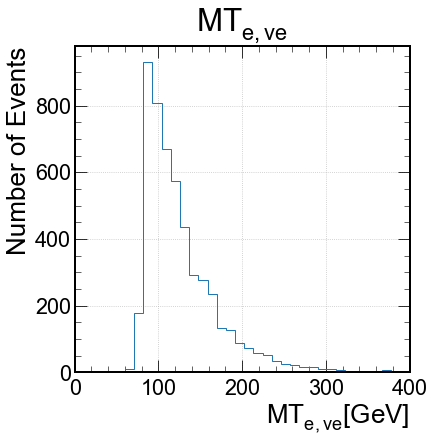

In [44]:
plt.hist(enuVec.mt,bins=100,histtype='step')
plt.xlim(0,400)
plt.title("$MT_{e,ve}$")
plt.xlabel("$MT_{e,ve}$[GeV]")
plt.ylabel("Number of Events")
plt.grid()